In [ ]:
%pip install pandas



In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('car data.csv')

In [ ]:
df.head()

In [12]:
## selling price is dependent features
## 8 independent variables
## Categorical features are Car_Name, Fuel_Type, Seller_Type, Transmission, Owner


In [13]:
## Print unique values of Categorical features
## can also be done by list comprehension
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())
print(df['Car_Name'].unique())




['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Act

In [14]:
## check missing/null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
### No null valeus are there in data frame

In [16]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [17]:
## one of the column is YEAR
## we have to derived a new column as Number of years (current Year - given Year) to accomodate car depreciation

In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [19]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
## removed Car_Name due to too many different values in it, and not adding values to model

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
final_dataset['Current_Year']=2023

In [22]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Current_Year   301 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 21.3+ KB


In [23]:
#Year and Current year column Dtype is int64 so we can subract from it

In [24]:
final_dataset['No_of_Year']=final_dataset['Current_Year']-final_dataset['Year']

In [25]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [26]:
#we dont need Year columns any more
final_dataset.drop(['Year'],axis=1, inplace=True)

In [27]:
#we dont need Current Year columns any more
final_dataset.drop(['Current_Year'],axis=1, inplace=True)

In [28]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [29]:
### Convert CATEGORICAL VALUES TO INT
final_dataset=pd.get_dummies(final_dataset, drop_first=True)
#use get_dummies for once hot encoding
## dont need first columns in one hot encoding in form of 1 & 0, we can estimate from remaining column


In [30]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [31]:
## If we have many cardinal values, then not use one hot encoding

In [32]:
### FIND CORELATION

In [33]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [34]:
## display correlation in diagramatic way

In [35]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import seaborn as sns

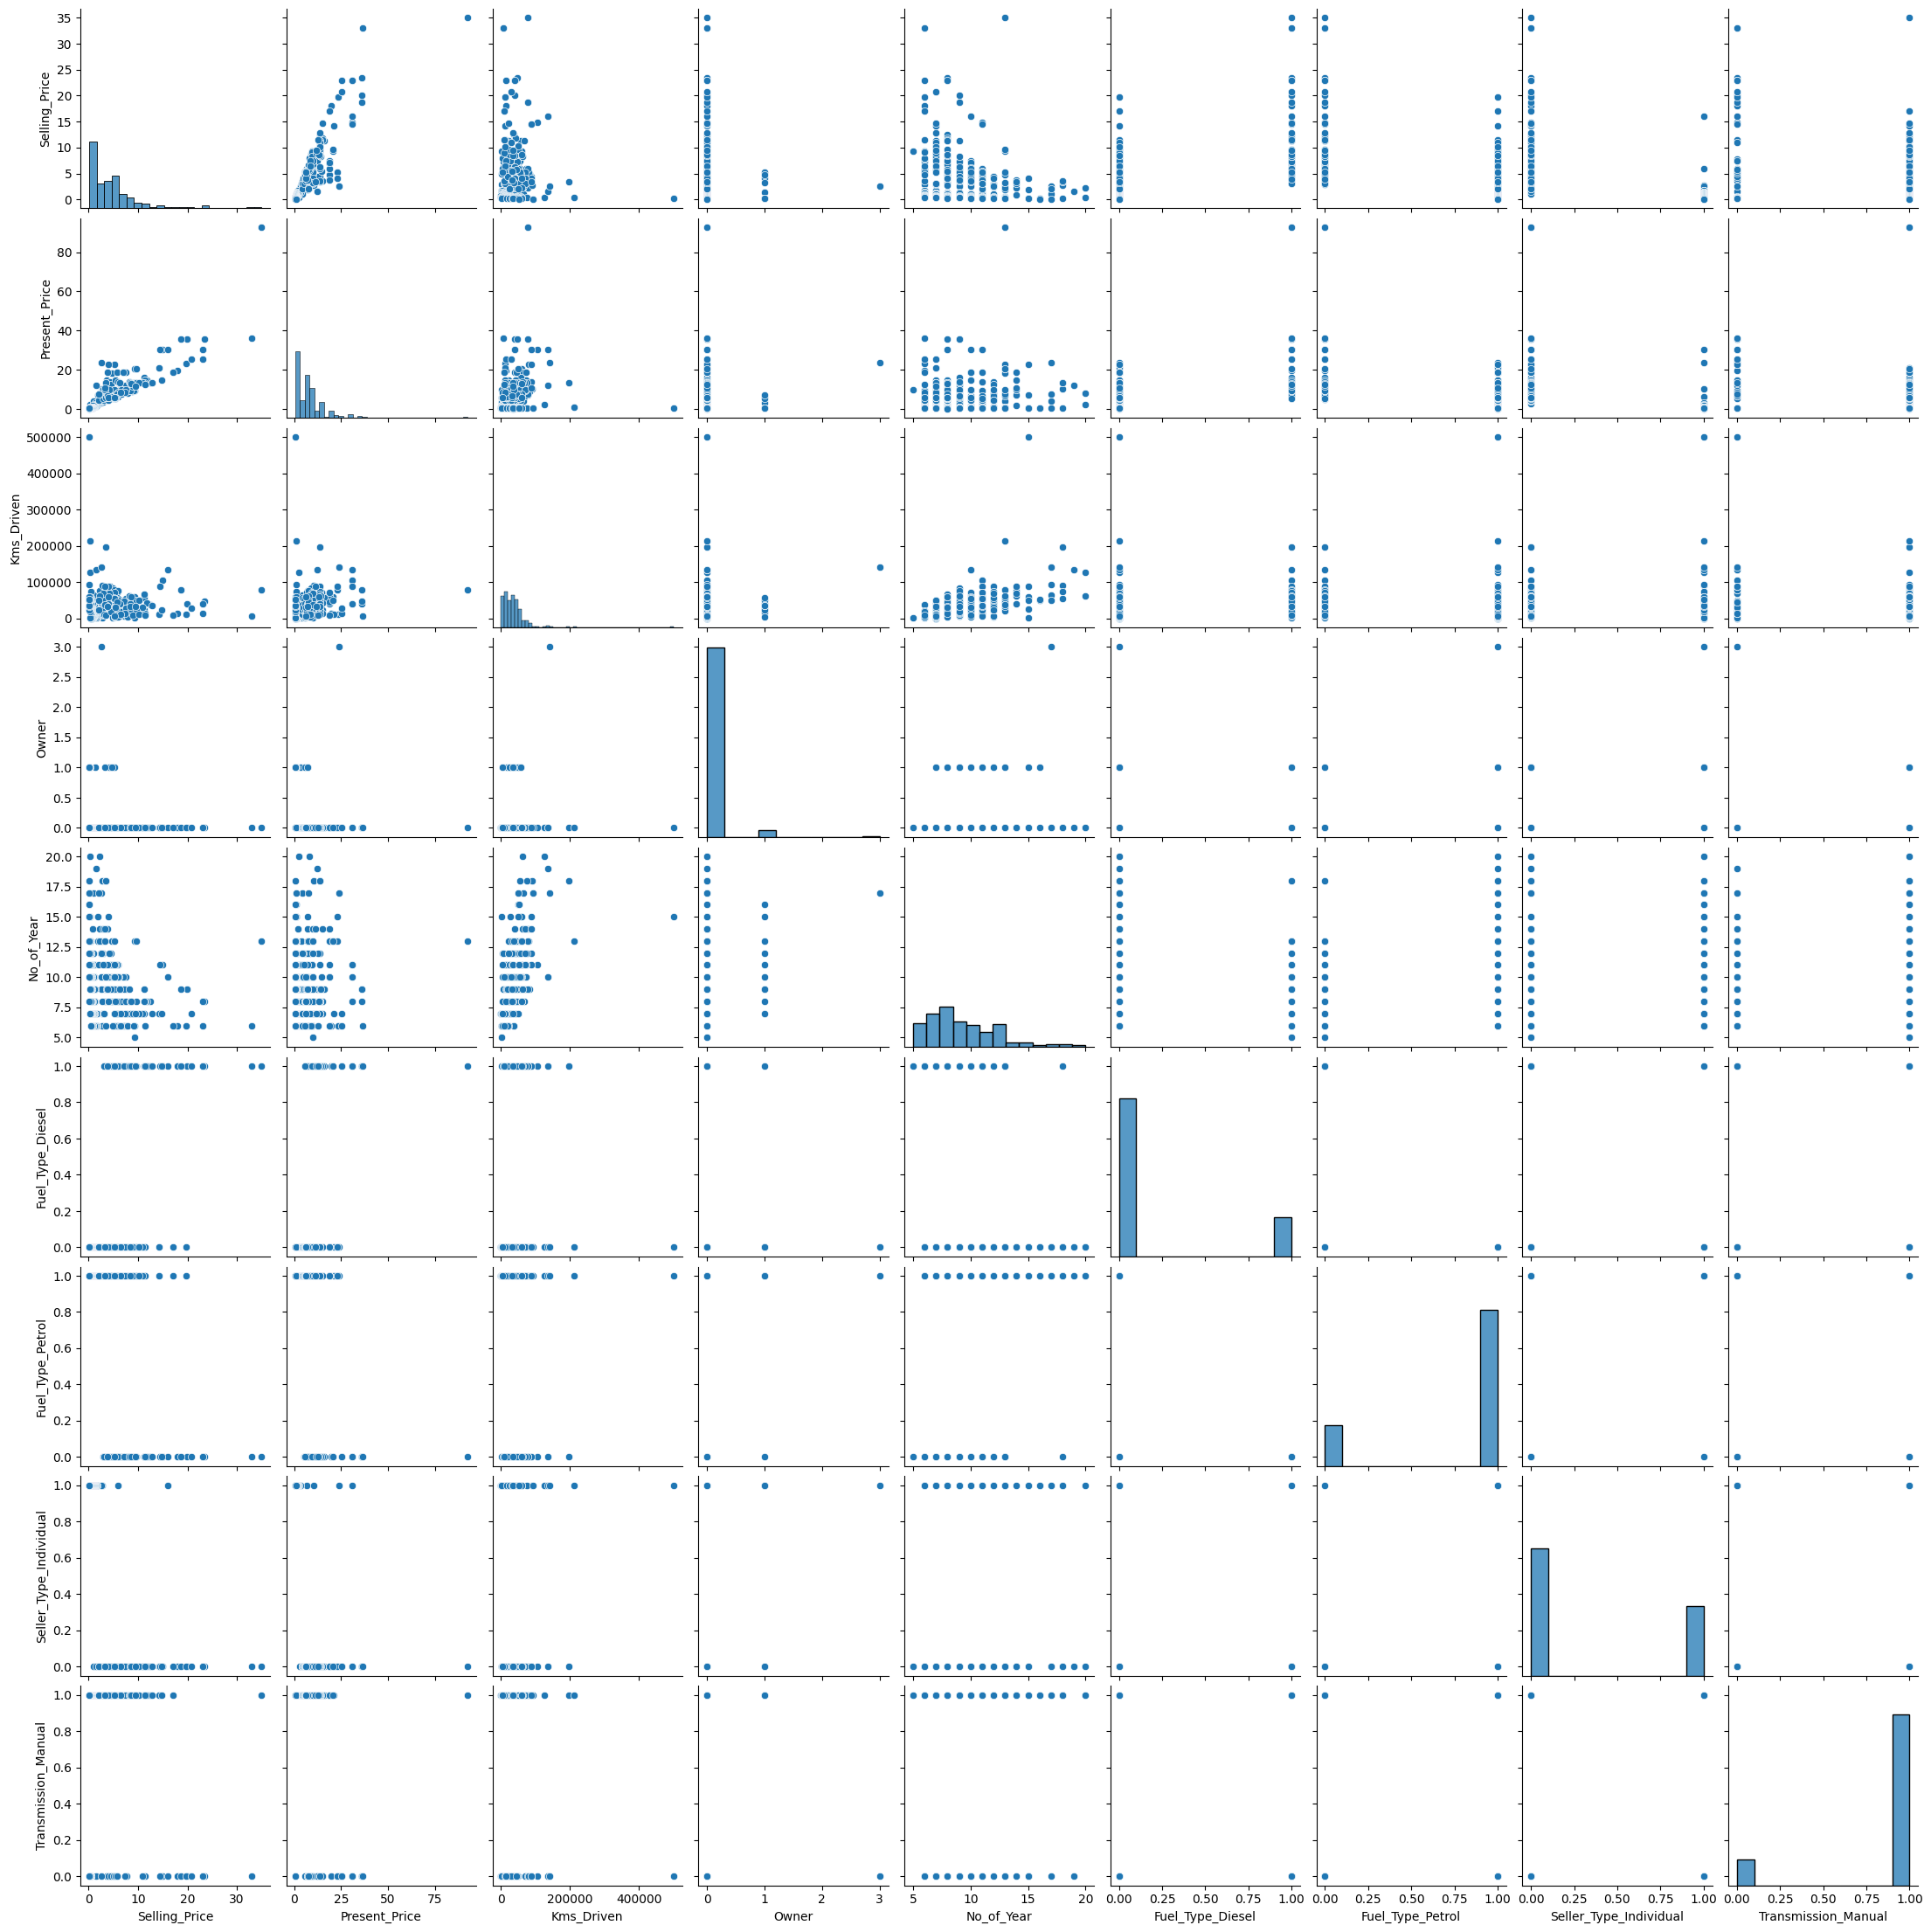

In [37]:
sns.pairplot(final_dataset)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

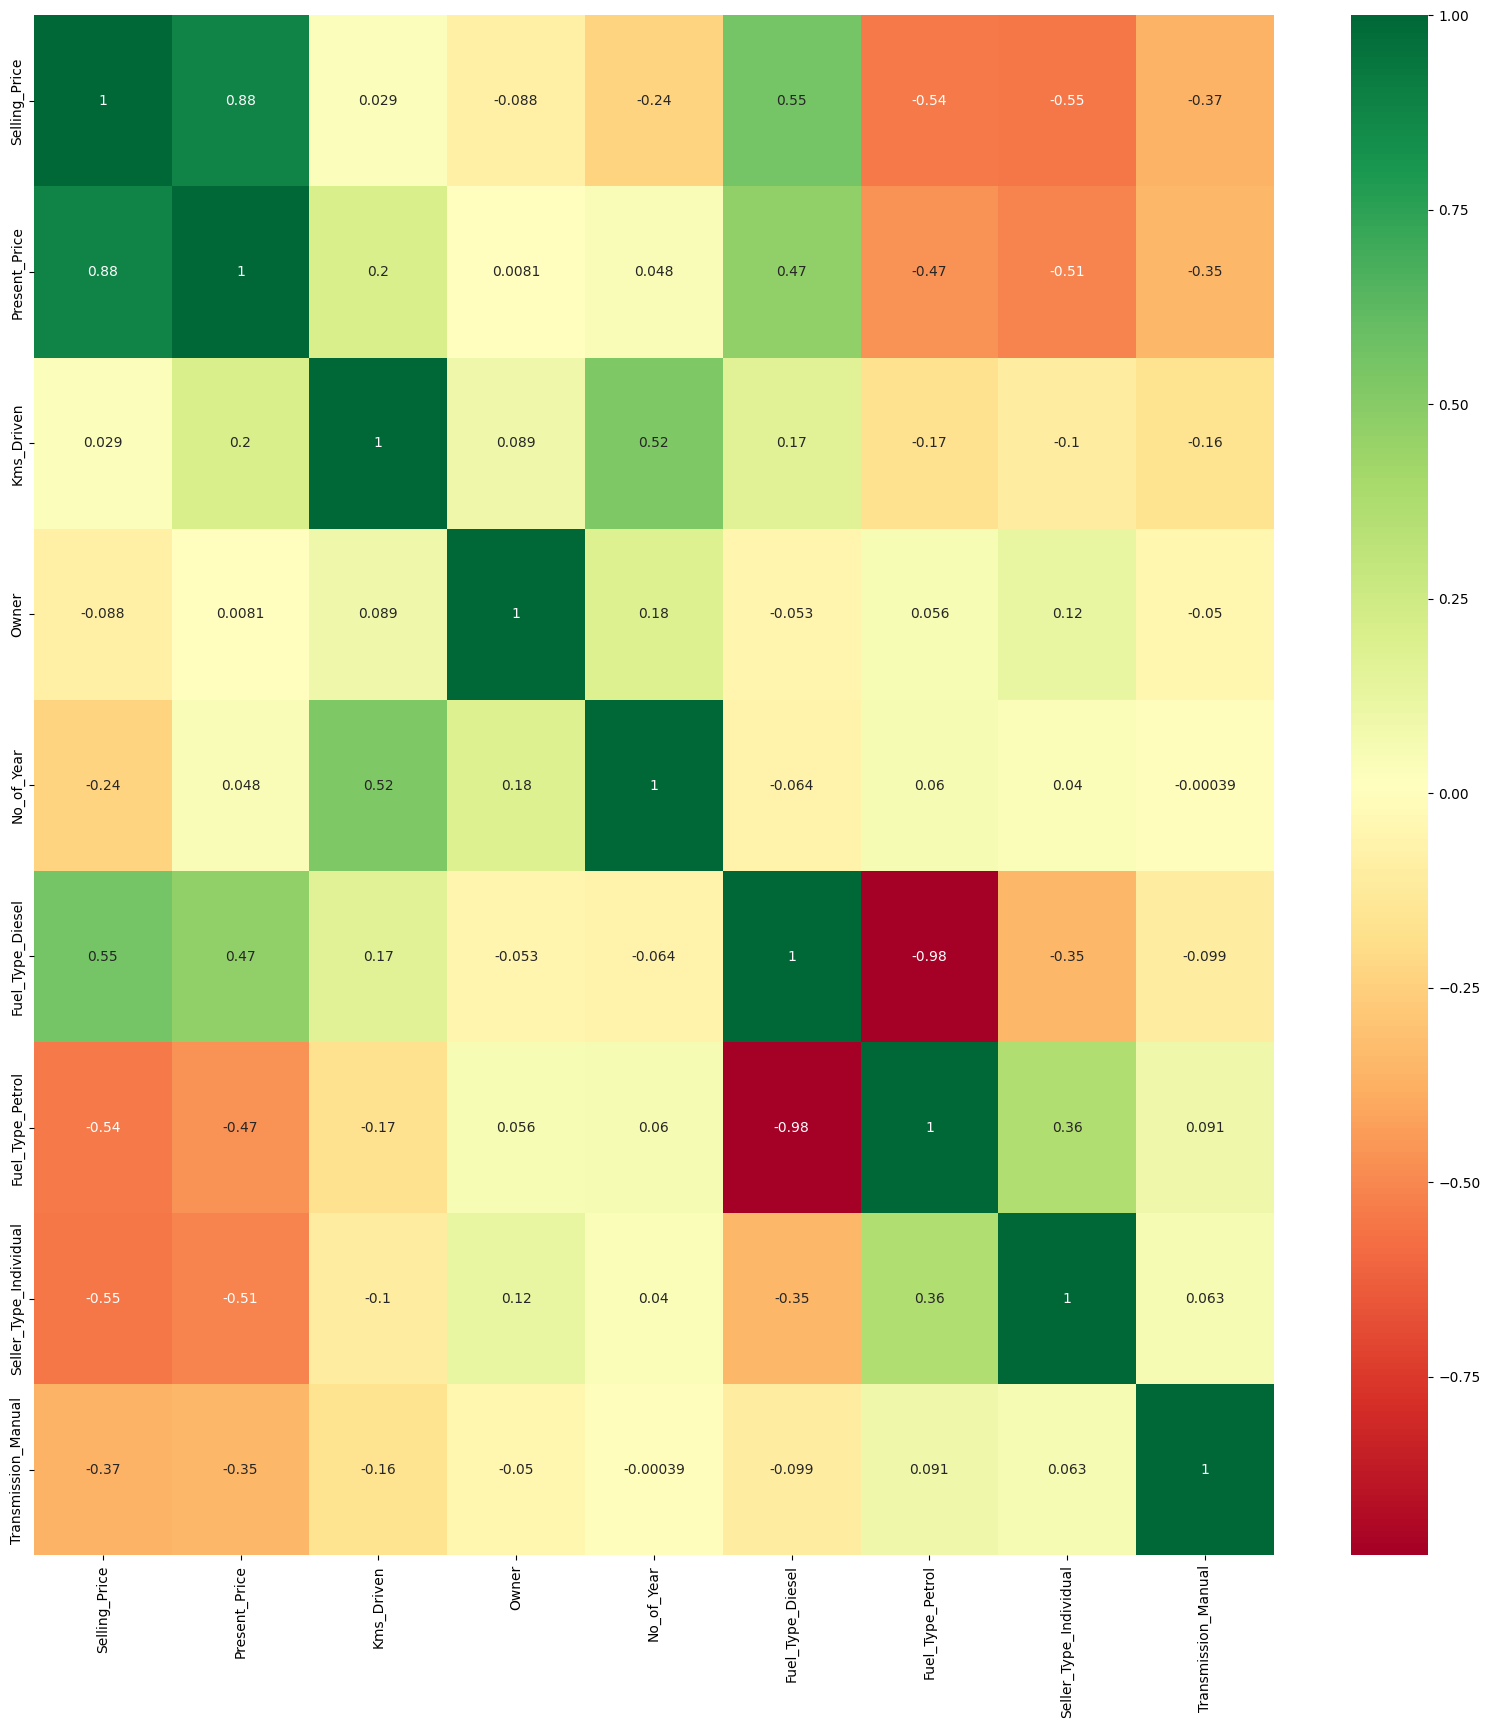

In [39]:
## plot inform of heat map
##correlation uses pearson correlation
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))

##plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [40]:
# if we have huge number of features then we can have condition that if correlation is higher than 0.85 and less than -0.8
## at that time we can show we can drop those features

In [41]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


In [42]:
X=final_dataset.iloc[:,1:] # independent features
y=final_dataset.iloc[:,0]  # dependent feature

In [43]:
X.head()


,Present_Price,Kms_Driven,Owner,No_of_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1


In [44]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [45]:
#install scikit-learn

In [52]:
### FEATURE IMPORTANCE
from sklearn.ensemble import ExtraTreesRegressor
## due to regression problem we took decision tree regressor

In [53]:
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [54]:
print(model.feature_importances_)

[0.3979813  0.03859545 0.00046106 0.07633935 0.21981948 0.01243628
 0.1267551  0.127612  ]


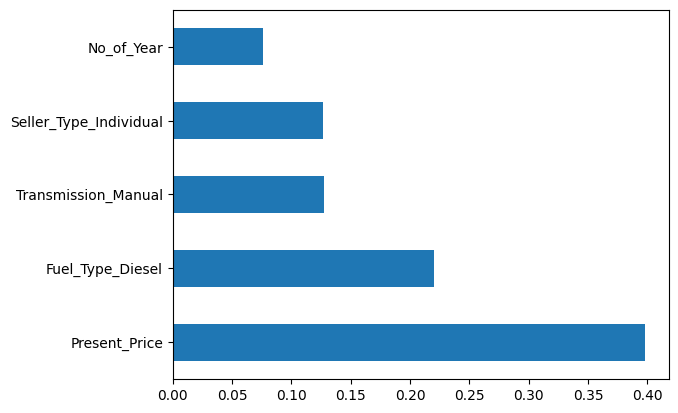

In [55]:
## PLOT GRAPH OF FEATURE IMPORTANCES FOR BETTER VISUALIZATION
feat_importances = pd.Series(model.feature_importances_, index=X.columns) #make Series of importansce with features names
feat_importances.nlargest(5).plot(kind='barh') ##take top 5 largest featues to plot only
plt.show()

In [56]:
#present price is most imp feature
#Fuel_Type_Diesel is second most imp features

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [61]:
X_train.shape

(240, 8)

In [62]:
## Apply random forest algorithm here,## it uses decision tree so wont be doinf featuring scaling
## its only done where disances are taken at backend of algo


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

##shift+tab for parameter, we need to play with parameters to avoid over or under fitting
#so we do hyper parameter tuning

In [66]:
import numpy as np

### HYPER PARAMETER TUNING

In [73]:
## HYPER PARAMETERS
## n_estimator= decision trees, can be assigned vlaues to it, bydefault is 100
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
## decsion trees will be 100, 200, 300, ... 1200
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [74]:
from sklearn.model_selection import RandomizedSearchCV 

In [76]:
## More Hyper Parameters for tuning usinf randomized search cv.
## Randomized search CV helps in finding out the best parameters out of the range we provides
#Randomized Search CV is little much faster than Grid Search CV


##criterion is default 'mse' in regressor
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]



In [77]:
### Create the random grid in key value pairs
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
## now randomized search CV will pick the best parameter out of it
### we can also use the grid search CV

In [79]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [80]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(X_train,y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
## verbose is used to display results
##estimator= randome forest 'rf'. 
#n_jobs = 1 how many cores of laptops we need to use
## cross validation =5, means first 4 will be in train, and last in train


In [88]:
predictions=rf_random.predict(X_test)

In [89]:
predictions

array([ 0.9901   ,  7.9776   , 21.89817  ,  0.57459  ,  1.08081  ,
        2.50132  ,  3.5124375,  6.77212  , 10.58987  , 11.46754  ,
        0.53348  ,  9.03784  ,  4.92801  ,  5.20171  ,  4.8711   ,
        7.48295  ,  5.36096  ,  0.68373  ,  4.2797   ,  3.17408  ,
        2.95165  ,  6.84605  ,  0.60305  , 10.96864  ,  1.36786  ,
        2.92837  ,  7.48304  ,  0.79196  ,  5.73615  , 19.75282  ,
        0.49383  ,  4.3663   ,  0.59316  ,  5.1565   ,  0.29108  ,
        2.97718  ,  7.25217  ,  5.19768  ,  3.3916   ,  0.4684   ,
        0.47926  ,  1.18886  ,  2.72997  ,  1.2244   , 10.80882  ,
        8.51237  ,  7.11766  ,  0.88008  ,  5.2602   ,  3.09933  ,
        3.32262  ,  3.718    ,  1.18661  ,  5.17496  ,  3.9715575,
        4.6249   ,  0.59701  ,  7.67559  ,  8.44056  ,  0.9834   ,
        2.86986  ])

In [90]:
## to compare predictions with y_test use distplot

## if distribution is normal then use good predictions

C:\Users\ASUS\anaconda3\envs\carprediction\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

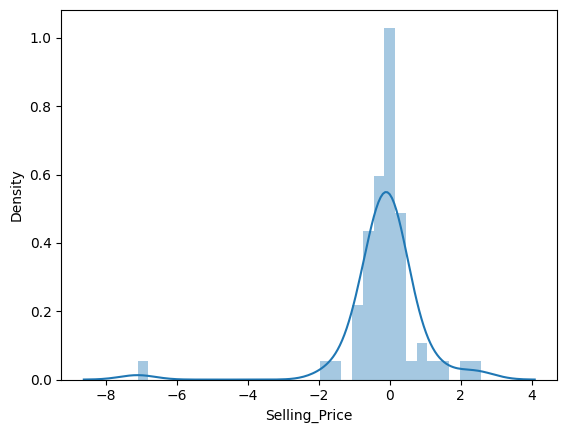

In [91]:
sns.distplot(y_test-predictions)

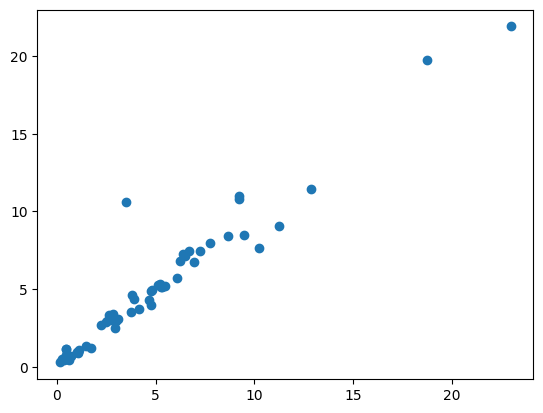

In [92]:
##scatter plot
plt.scatter(y_test,predictions)

In [93]:
### Graph is linear so it means prediction is good

In [94]:
## Pickle the file
import pickle
#open a file, where you want to store the data
file = open('random_forest_regression_model.pkl', 'wb')
#wb = white byte morse

##dump information to that file
pickle.dump(rf_random, file)

In [95]:
##pickel file is a serialized file which will be use in deployment
